# Information

Ahmadfajarrizkyfirdaus@gmail.com



Tentang Kumpulan Data ini: Netflix adalah salah satu platform media dan streaming video paling populer. Mereka memiliki lebih dari 8000 film atau acara TV yang tersedia di platform mereka, pada pertengahan tahun 2021, mereka memiliki lebih dari 200 juta Pelanggan secara global. Kumpulan data tabel ini terdiri dari daftar semua film dan acara TV yang tersedia di Netflix, beserta detail seperti - pemeran, sutradara, peringkat, tahun rilis, durasi, dll.


1.   Memahami konten apa yang tersedia di berbagai negara

2.   Apakah Netflix lebih fokus pada Acara TV daripada film dalam beberapa tahun terakhir.



show_id: Unik identifier untuk setiap tayangan (show) di Netflix.

type: Jenis konten, misalnya "Movie" atau "TV Show".

title: Judul dari tayangan.

director: Nama sutradara tayangan (hanya berlaku untuk film).

cast: Nama-nama aktor atau aktris yang terlibat dalam tayangan.

country: Negara atau negara-negara tempat produksi atau tersedia tayangan.

date_added: Tanggal tayangan ditambahkan ke Netflix.

release_year: Tahun rilis tayangan.

rating: Klasifikasi usia atau rating dari tayangan.

duration: Durasi tayangan, misalnya "1 Season" atau "90 min".

listed_in: Kategori atau genre tayangan.

description: Deskripsi singkat tentang tayangan.

# Import & Getring Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Dataset Project/netflix_titles.csv")
df = pd.DataFrame(dataset)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Assesing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [5]:
# Hitung jumlah record
jumlah_record = len(df)

# Cetak jumlah record
print(jumlah_record)

8807


In [6]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
unique_rating = df['rating'].unique()

# Menampilkan nama-nama kategori
print("Unique rating:")
for rating in unique_rating:
    print(rating)

Unique rating:
PG-13
TV-MA
PG
TV-14
TV-PG
TV-Y
TV-Y7
R
TV-G
G
NC-17
74 min
84 min
66 min
NR
nan
TV-Y7-FV
UR



PG-13: Parental Guidance-13. Disarankan untuk anak-anak di atas usia 13 tahun.

TV-MA: TV-Mature Audiences. Tayangan ini mungkin tidak sesuai untuk anak-anak di bawah 17 tahun.

PG: Parental Guidance. Disarankan untuk orang tua, beberapa materi mungkin tidak sesuai untuk anak-anak.

TV-14: Tayangan ini mungkin hanya sesuai untuk penonton 14 tahun ke atas.

TV-PG: Tayangan ini mungkin sesuai untuk anak-anak di atas usia 7 tahun, tetapi beberapa materi mungkin tidak sesuai.

TV-Y: Tayangan ini sesuai untuk semua usia.

TV-Y7: Tayangan ini mungkin tidak sesuai untuk anak-anak di bawah usia 7 tahun.

R: Tayangan ini diperuntukkan untuk penonton dewasa atau penonton di atas 17 tahun. Orang tua diharapkan memberikan panduan.

TV-G: Tayangan umum. Sesuai untuk semua penonton.

G: Umum (General). Semua umur dapat menonton.

NC-17: No one 17 and under admitted. Tayangan ini hanya untuk penonton dewasa.

74 min, 84 min, 66 min: Mungkin merujuk pada durasi tayangan dalam menit.

NR: Not Rated. Tidak ada rating spesifik yang diberikan.

nan: Missing value, artinya tidak ada data yang tersedia untuk rating pada entri tersebut.

TV-Y7-FV: Tayangan ini mungkin tidak sesuai untuk anak-anak di bawah usia 7 tahun dengan tambahan "fantasy violence".

UR: Unrated. Tidak memiliki rating atau belum dinilai.

In [8]:
# Mengubah list di dalam kolom 'country' menjadi string yang dapat diproses
df['country'] = df['country'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Menampilkan nilai unik pada kolom 'country'
unique_countries = df['country'].unique()

# Menampilkan hasil
print(unique_countries)


['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Russia'
 'Canada' 'Hong Kong' 'United States, China, Hong Kong'
 'Italy, United States' 'United States, G

In [9]:
unique_duration = df['duration'].unique()

# Menampilkan nama-nama kategori
print("Unique duration:")
for duration in unique_duration:
    print(duration)

Unique duration:
90 min
2 Seasons
1 Season
91 min
125 min
9 Seasons
104 min
127 min
4 Seasons
67 min
94 min
5 Seasons
161 min
61 min
166 min
147 min
103 min
97 min
106 min
111 min
3 Seasons
110 min
105 min
96 min
124 min
116 min
98 min
23 min
115 min
122 min
99 min
88 min
100 min
6 Seasons
102 min
93 min
95 min
85 min
83 min
113 min
13 min
182 min
48 min
145 min
87 min
92 min
80 min
117 min
128 min
119 min
143 min
114 min
118 min
108 min
63 min
121 min
142 min
154 min
120 min
82 min
109 min
101 min
86 min
229 min
76 min
89 min
156 min
112 min
107 min
129 min
135 min
136 min
165 min
150 min
133 min
70 min
84 min
140 min
78 min
7 Seasons
64 min
59 min
139 min
69 min
148 min
189 min
141 min
130 min
138 min
81 min
132 min
10 Seasons
123 min
65 min
68 min
66 min
62 min
74 min
131 min
39 min
46 min
38 min
8 Seasons
17 Seasons
126 min
155 min
159 min
137 min
12 min
273 min
36 min
34 min
77 min
60 min
49 min
58 min
72 min
204 min
212 min
25 min
73 min
29 min
47 min
32 min
35 min
71 min
149 min

In [10]:
# Mengubah kolom 'date_added' menjadi tipe datetime agar dapat diurutkan
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Mengurutkan data berdasarkan 'date_added' dan mengambil tayangan pertama
earliest_show = df.sort_values(by='date_added').iloc[0]

# Menampilkan tayangan pertama yang ditambahkan beserta genre
print(f"Tayangan pertama yang ditambahkan ke Netflix:\n")
print(f"Title: {earliest_show['title']}")
print(f"Date Added: {earliest_show['date_added'].strftime('%Y-%m-%d')}")
print(f"Genre: {earliest_show['listed_in']}")


Tayangan pertama yang ditambahkan ke Netflix:

Title: To and From New York
Date Added: 2008-01-01
Genre: Dramas, Independent Movies, Thrillers


# Cleaning Data

1.  pananganan nilai Nan
2.  ubah type data
3.  modifikasi colom duration
4.  menghapus colom cast
5.  memperbaiki record dalam colom country

In [11]:
# Nan menjadi other di colom director
# perubahan menjadi other karena nilai nan pada colom ini terlalu banyak dan jika di drop akan berdapk besar pada hasil analisis
# Mengganti nilai NaN dengan "other" pada kolom "director"

df['director'].fillna('other', inplace=True)

In [12]:
# Menghapus kolom "cast"
df.drop('cast', axis=1, inplace=True)

In [13]:
# Mengisi nilai NaN pada kolom "rating" secara manual
df.loc[df['title'] == '13TH: A Conversation with Oprah Winfrey & Ava DuVernay', 'rating'] = 'TV-MA'
#kenapa TV-MA ,karena  Mungkin mengandung konten yang tidak cocok untuk anak di bawah 17 tahun.

In [14]:
# Mengisi nilai NaN pada kolom "rating" secara manual
df.loc[df['title'] == 'Little Lunch', 'rating'] = 'G'
# kenapa G , karena G = general atau untuk semua dan jika
#di lihat dari colom listed_in saya menyimpulkan kalau ini cocok untuk semua

In [15]:
# Mengisi nilai NaN pada kolom "rating" secara manual
df.loc[df['title'] == 'Gargantia on the Verdurous Planet', 'rating'] = 'G'

In [16]:
# Mengisi nilai NaN pada kolom "rating" secara manual
df.loc[df['title'] == 'My Honor Was Loyalty', 'rating'] = 'TV-MA'

In [17]:
#cek nilai Nan kembali pada colom Rating
filtered_df = df[df['rating'].isna()]

# Menampilkan DataFrame setelah filter
filtered_df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description


In [18]:
# Menggantikan NaN dengan nilai yang sering muncul (mode) pada kolom "Duration"
mode_rating = df['duration'].mode()[0]  # Mengambil mode (nilai yang sering muncul)
df['duration'].fillna(mode_rating, inplace=True)

In [19]:
#karena tidak mungkin mengahpus record atau menghapus colom country jadi nilai Nan pada colom country diubah menjadi other
df['country'].fillna('other', inplace=True)

In [20]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,98
release_year,0
rating,0
duration,0
listed_in,0


NOTE : TIDAK DILAKUKAN NYA PENGHAPUSAN NILAI NAN

nilai Nan pada colom data_added dikarenakan akan mempengaruhi banyak hasil analisis .

dan saya ***MENEMUKAN KEUNIKAN*** pada nilai Nan ini pada colom date_added karena semua nilai nan ini terdapat dalam satu filter yaitu dimana kondisi type nya adalah TV Movies.

jadi jika ingin memifilter dengan kondisi tersebut harus ***hati hati***

In [21]:
# Mengubah kolom "date_added" menjadi tipe data datetime
df['date_added'] = pd.to_datetime(df['date_added'], infer_datetime_format=True, errors='coerce')

# Mengubah kolom "release_year" menjadi tipe data datetime (asumsi hari pertama di setiap tahun)
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce').dt.to_period('Y')


<ipython-input-21-0b837d4a4a2c>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_added'] = pd.to_datetime(df['date_added'], infer_datetime_format=True, errors='coerce')


In [22]:
print(df.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year     period[A-DEC]
rating                  object
duration                object
listed_in               object
description             object
dtype: object


pada colom duration terdapat 2 record yang berdeda ada yang berbentuk menit dana season. ini membuat saya berfikir untuk memisahkan nya saja menjadi 2 colom yang tadi nya 1 colom saja.

Duration = duration_minutes dan duration_season.

dengan ASUMSI dimana Asumsi 1 season = 7 episode * 60 menit per episode

In [23]:
# Mengubah kolom "duration" menjadi dua kolom terpisah
def extract_duration(row):
    if 'min' in row['duration']:
        return int(row['duration'].split(' ')[0])
    elif 'Season' in row['duration']:
        return int(row['duration'].split(' ')[0]) * 7 * 60  # Asumsi 1 season = 7 episode * 60 menit per episode
    else:
        return None

df['duration_minutes'] = df.apply(extract_duration, axis=1)
df['duration_seasons'] = df.apply(lambda row: int(row['duration'].split(' ')[0]) if 'Season' in row['duration'] else 0, axis=1)



# Menampilkan tipe data kolom untuk memastikan konversi
print(df.dtypes)


show_id                     object
type                        object
title                       object
director                    object
country                     object
date_added          datetime64[ns]
release_year         period[A-DEC]
rating                      object
duration                    object
listed_in                   object
description                 object
duration_minutes             int64
duration_seasons             int64
dtype: object


In [24]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,0
1,s2,TV Show,Blood & Water,other,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",840,2
2,s3,TV Show,Ganglands,Julien Leclercq,other,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,420,1
3,s4,TV Show,Jailbirds New Orleans,other,other,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",420,1
4,s5,TV Show,Kota Factory,other,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,840,2


In [25]:
# Memisahkan negara dengan koma dan spasi
df['country'] = df['country'].str.split(', ')  # Memisahkan negara

# Menggunakan pd.explode() untuk memisahkan negara menjadi baris-baris terpisah
df = df.explode('country')

# Cek data setelah explode()
print(df[['country']].head())

         country
0  United States
1   South Africa
2          other
3          other
4          India


In [26]:
# Menampilkan nilai unik pada kolom 'country'
newunique_countries = df['country'].unique()

# Menampilkan hasil
print(newunique_countries)

['United States' 'South Africa' 'other' 'India' 'Ghana' 'Burkina Faso'
 'United Kingdom' 'Germany' 'Ethiopia' 'Czech Republic' 'Mexico' 'Turkey'
 'Australia' 'France' 'Finland' 'China' 'Canada' 'Japan' 'Nigeria' 'Spain'
 'Belgium' 'South Korea' 'Singapore' 'Italy' 'Romania' 'Argentina'
 'Venezuela' 'Hong Kong' 'Russia' '' 'Ireland' 'Nepal' 'New Zealand'
 'Brazil' 'Greece' 'Jordan' 'Colombia' 'Switzerland' 'Israel' 'Taiwan'
 'Bulgaria' 'Algeria' 'Poland' 'Saudi Arabia' 'Thailand' 'Indonesia'
 'Egypt' 'Denmark' 'Kuwait' 'Netherlands' 'Malaysia' 'Vietnam' 'Hungary'
 'Sweden' 'Lebanon' 'Syria' 'Philippines' 'Iceland' 'United Arab Emirates'
 'Norway' 'Qatar' 'Mauritius' 'Austria' 'Cameroon' 'Palestine' 'Uruguay'
 'United Kingdom,' 'Kenya' 'Chile' 'Luxembourg' 'Cambodia' 'Bangladesh'
 'Portugal' 'Cayman Islands' 'Senegal' 'Serbia' 'Malta' 'Namibia' 'Angola'
 'Peru' 'Mozambique' 'Cambodia,' 'Belarus' 'Zimbabwe' 'Puerto Rico'
 'Pakistan' 'Cyprus' 'Guatemala' 'Iraq' 'Malawi' 'Paraguay' 'Croatia

In [27]:
# Memisahkan negara dengan koma dan spasi
df['listed_in'] = df['listed_in'].str.split(', ')  # Memisahkan negara

# Menggunakan pd.explode() untuk memisahkan negara menjadi baris-baris terpisah
df = df.explode('listed_in')

# Cek data setelah explode()
print(df[['listed_in']].head())

                listed_in
0           Documentaries
1  International TV Shows
1               TV Dramas
1            TV Mysteries
2          Crime TV Shows


In [28]:
# Menampilkan nilai unik pada kolom 'country'
newunique_listed_in = df['listed_in'].unique()

# Menampilkan hasil
print(newunique_listed_in)

['Documentaries' 'International TV Shows' 'TV Dramas' 'TV Mysteries'
 'Crime TV Shows' 'TV Action & Adventure' 'Docuseries' 'Reality TV'
 'Romantic TV Shows' 'TV Comedies' 'TV Horror' 'Children & Family Movies'
 'Dramas' 'Independent Movies' 'International Movies' 'British TV Shows'
 'Comedies' 'Spanish-Language TV Shows' 'Thrillers' 'Romantic Movies'
 'Music & Musicals' 'Horror Movies' 'Sci-Fi & Fantasy' 'TV Thrillers'
 "Kids' TV" 'Action & Adventure' 'TV Sci-Fi & Fantasy' 'Classic Movies'
 'Anime Features' 'Sports Movies' 'Anime Series' 'Korean TV Shows'
 'Science & Nature TV' 'Teen TV Shows' 'Cult Movies' 'TV Shows'
 'Faith & Spirituality' 'LGBTQ Movies' 'Stand-Up Comedy' 'Movies'
 'Stand-Up Comedy & Talk Shows' 'Classic & Cult TV']


# save data

In [29]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,0
1,s2,TV Show,Blood & Water,other,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",840,2
1,s2,TV Show,Blood & Water,other,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",840,2
1,s2,TV Show,Blood & Water,other,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",840,2
2,s3,TV Show,Ganglands,Julien Leclercq,other,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,420,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,United States,2020-01-11,2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero...",88,0
8805,s8806,Movie,Zoom,Peter Hewitt,United States,2020-01-11,2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero...",88,0
8806,s8807,Movie,Zubaan,Mozez Singh,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,111,0
8806,s8807,Movie,Zubaan,Mozez Singh,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,111,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23754 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           23754 non-null  object        
 1   type              23754 non-null  object        
 2   title             23754 non-null  object        
 3   director          23754 non-null  object        
 4   country           23754 non-null  object        
 5   date_added        23526 non-null  datetime64[ns]
 6   release_year      23754 non-null  period[A-DEC] 
 7   rating            23754 non-null  object        
 8   duration          23754 non-null  object        
 9   listed_in         23754 non-null  object        
 10  description       23754 non-null  object        
 11  duration_minutes  23754 non-null  int64         
 12  duration_seasons  23754 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(9), period[A-DEC](1)
memory usage: 2.5+ MB


In [31]:
df.to_csv('netflix_clean.csv', index=False)

# Visualisasi



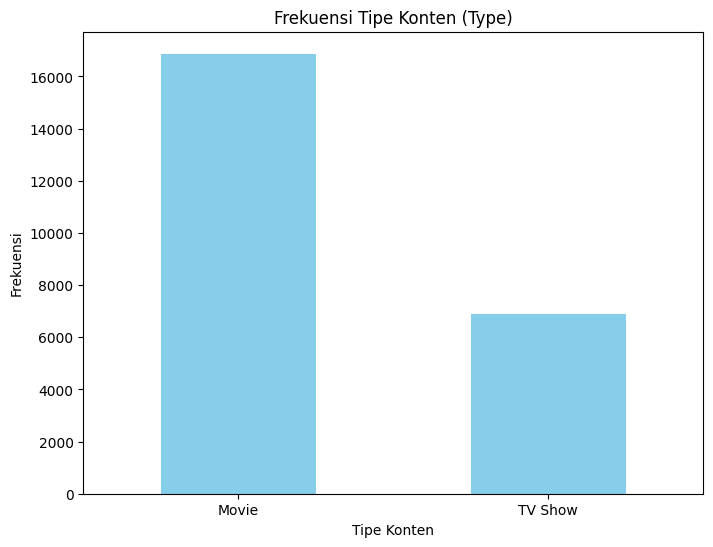

In [32]:
# Menghitung frekuensi setiap nilai dalam kolom "type"
type_counts = df['type'].value_counts()

# Membuat grafik bar
plt.figure(figsize=(8, 6))
type_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Frekuensi Tipe Konten (Type)')
plt.xlabel('Tipe Konten')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.show()

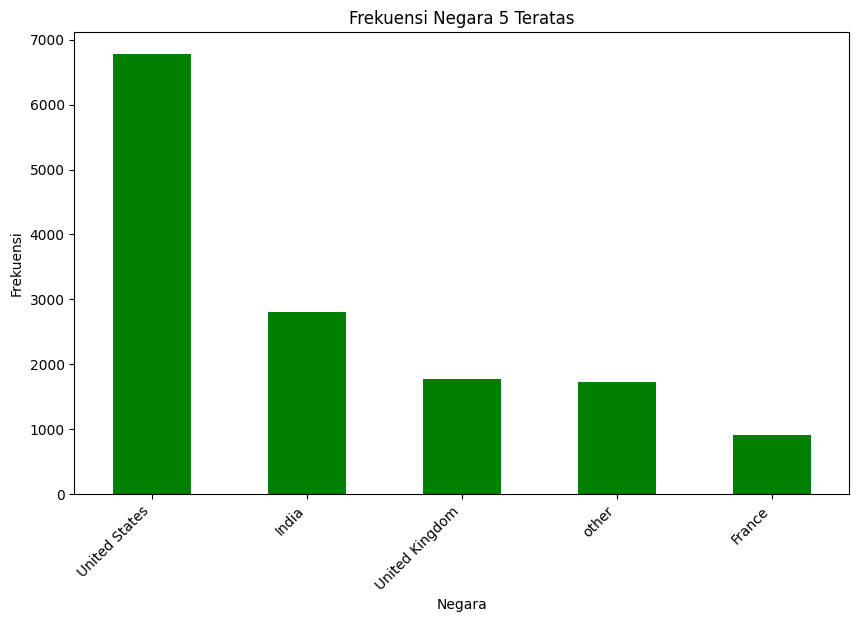

In [33]:
# Menghitung frekuensi setiap nilai dalam kolom "country"
country_counts = df['country'].value_counts().head(5)  # Ambil 5 teratas

# Membuat grafik bar
plt.figure(figsize=(10, 6))
country_counts.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Frekuensi Negara 5 Teratas')
plt.xlabel('Negara')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.show()

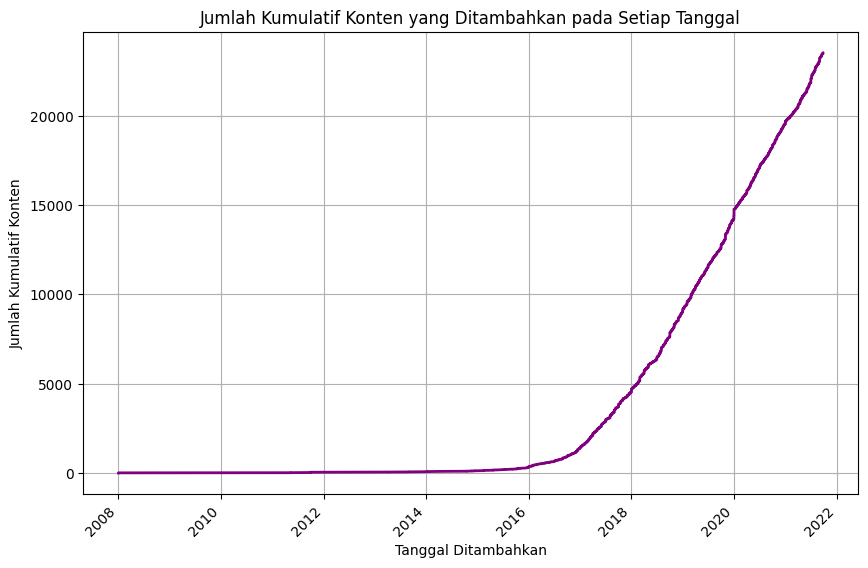

In [34]:
# Mengurutkan DataFrame berdasarkan tanggal
df = df.sort_values(by='date_added')

# Menghitung jumlah kumulatif untuk setiap tanggal
df['cumulative_count'] = range(1, len(df) + 1)

# Membuat grafik garis time series
plt.figure(figsize=(10, 6))
plt.plot(df['date_added'], df['cumulative_count'], marker='', color='purple', linestyle='-', linewidth=2)
plt.title('Jumlah Kumulatif Konten yang Ditambahkan pada Setiap Tanggal')
plt.xlabel('Tanggal Ditambahkan')
plt.ylabel('Jumlah Kumulatif Konten')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

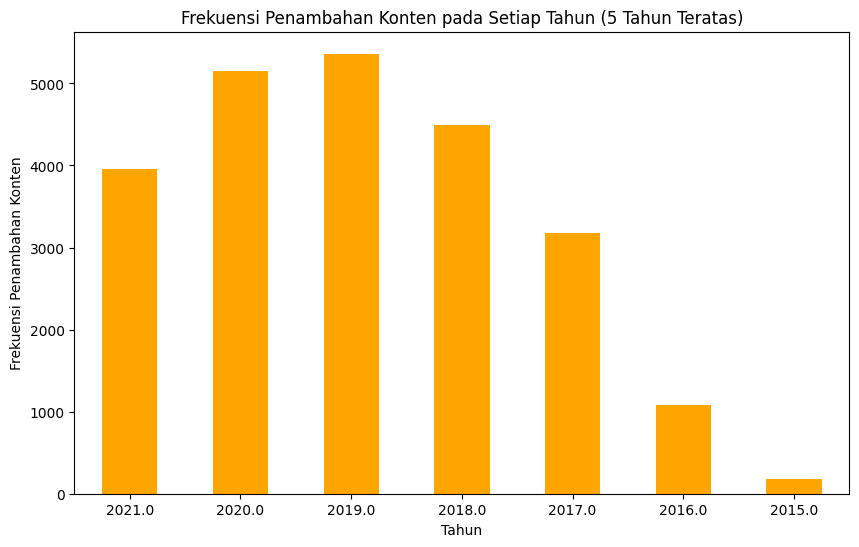

In [35]:
# Menghitung frekuensi setiap tahun
year_counts = df['date_added'].dt.year.value_counts().head(7)

# Membuat grafik bar untuk lima tahun teratas
plt.figure(figsize=(10, 6))
year_counts.sort_index(ascending=False).plot(kind='bar', color='orange')
plt.title('Frekuensi Penambahan Konten pada Setiap Tahun (5 Tahun Teratas)')
plt.xlabel('Tahun')
plt.ylabel('Frekuensi Penambahan Konten')
plt.xticks(rotation=0)
plt.show()

# New Section

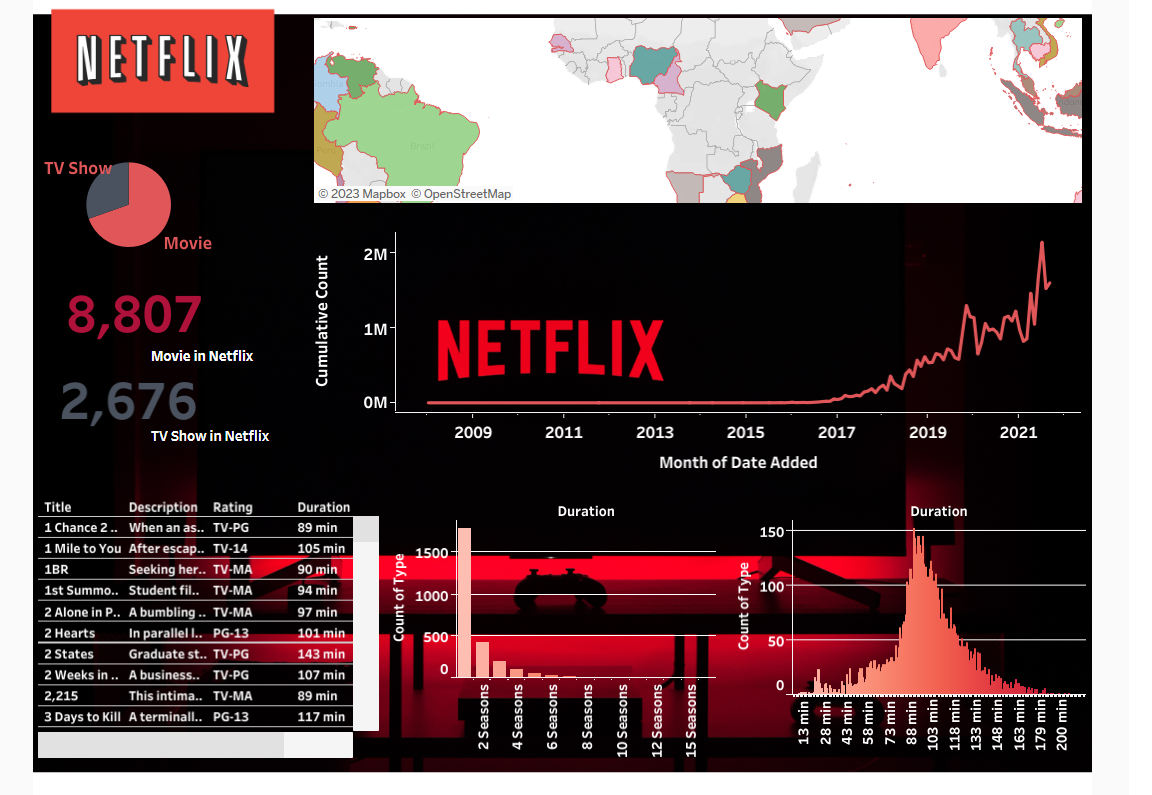

https://public.tableau.com/views/netflixdasboard_17022716998210/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

# Analisis lanjutan

## 1.Memahami konten apa yang tersedia di berbagai negara <br><br>
Analisis Eksploratif Lanjutan<br>
**Distribusi Konten berdasarkan Negara:** Analisis ini dapat menunjukkan negara-negara yang paling banyak memproduksi atau memiliki tayangan di Netflix. Bisa juga dieksplorasi genre apa yang paling populer di setiap negara.<br><br>
**Perubahan Fokus dari Film ke Acara TV**: Kamu bisa melihat tren tahunan apakah Netflix memang semakin banyak merilis acara TV dibandingkan film

###1.1 Distribusi Konten berdasarkan Negara:

In [36]:
# Mengelompokkan data berdasarkan negara dan menghitung jumlah tayangan per negara
country_distribution = df.groupby('country').size().reset_index(name='count')

# Mengurutkan dari negara dengan jumlah tayangan terbanyak
country_distribution = country_distribution.sort_values(by='count', ascending=False)

# Menampilkan hasilnya
print(country_distribution)

            country  count
119   United States   6779
47            India   2804
117  United Kingdom   1779
127           other   1722
38           France    916
..              ...    ...
15         Botswana      1
120  United States,      1
101         Somalia      1
57       Kazakhstan      1
10          Bahamas      1

[128 rows x 2 columns]


In [37]:
top_countries = country_distribution.head(5)#ubah angka di dalam kurung untuk memfilter banyak yang ingin ditampilkan

# Visualisasi distribusi negara-negara

fig = px.bar(top_countries, x='count', y='country',
             title='Distribusi Negara-Negara di Netflix',
             labels={'count': 'Jumlah Tayangan', 'country': 'Negara'},
             color='count',
             color_continuous_scale='magma')

fig.update_layout(xaxis_title='Jumlah Tayangan', yaxis_title='Negara')
fig.show()

ada categori other diperingkat 3 , mari kita bedah

setelah meliah nilai uniq pada colom country tidak ada uniq other

In [38]:
#memisahkan kategori other
# Mengambil data yang tergolong dalam kategori 'Other'
other_countries_list = df[~df['country'].isin(top_countries['country'])]

# Menghitung jumlah tayangan per negara dalam kategori 'Other'
other_countries_distribution = other_countries_list['country'].value_counts().reset_index(name='count')
other_countries_distribution.columns = ['country', 'count']

In [39]:
# Memilih 5 negara teratas dari kategori 'Other'
othertop_countries = other_countries_distribution.head(5)

# Visualisasi distribusi negara-negara dalam kategori 'Other'
fig = px.bar(othertop_countries, x='count', y='country',
             title='Distribusi Negara-Negara dalam Kategori "Other" di Netflix',
             labels={'count': 'Jumlah Tayangan', 'country': 'Negara'},
             color='count',
             color_continuous_scale='magma')

fig.update_layout(xaxis_title='Jumlah Tayangan', yaxis_title='Negara')
fig.show()

In [40]:
other_countries_distribution

,country,count
0,Canada,877
1,Japan,733
2,South Korea,632
3,Spain,591
4,Germany,511
...,...,...
118,"United States,",1
119,Uganda,1
120,Ecuador,1
121,Bermuda,1


setelah dilihat didalam categori other itu terdapat beberapa negara yang memiliki jam tayang kurang dari 400

ASUMSI

kategori other saat visual pertama pada  Visualisasi distribusi negara-negara terdapat kategori other dan ketika kategori other di Visualisasi terdapat beberapa nama negara ,<br>
 KEMUNGKINAN ini terjadi karena<br>
 "Other" bisa jadi adalah hasil pengelompokan kategori untuk negara-negara dengan jumlah tayangan yang sangat kecil sehingga digabungkan dalam kategori "other" untuk analisis atau visualisasi.<br>
***Pengaturan Default*** pada Library Visualisasi
Beberapa library visualisasi memiliki pengaturan default yang menggabungkan nilai-nilai kecil menjadi kategori "other" untuk memudahkan pembacaan grafik. Misalnya, seaborn atau matplotlib dapat menggunakan pengaturan default untuk mengelompokkan kategori dengan frekuensi rendah sebagai "other" jika tidak ada penanganan eksplisit untuk kategori tersebut.

In [41]:
print(df['release_year'].dtype)
print(df['date_added'].dtype)

period[A-DEC]
datetime64[ns]


In [42]:
#kolom release_year atau date_added memiliki tipe data Period atau datetime, yang tidak dapat diserialisasi menjadi JSON oleh Plotly.
#Jika tipe data adalah Period, datetime64, atau tipe data non-serializable lainnya, kita perlu mengonversinya.
#konversikan ke string atau tanggal dalam format yang dapat diserialisasi.
# Mengonversi 'release_year' ke integer
df['release_year'] = df['release_year'].astype(int)

df['date_added'] = df['date_added'].astype(str)

In [43]:
print(df.dtypes)

show_id             object
type                object
title               object
director            object
country             object
date_added          object
release_year         int64
rating              object
duration            object
listed_in           object
description         object
duration_minutes     int64
duration_seasons     int64
cumulative_count     int64
dtype: object


In [44]:
import plotly.express as px

# Menentukan 3 negara teratas berdasarkan jumlah tayangan
top_countries = df['country'].value_counts().nlargest(3).index.tolist()

# Memfilter data hanya untuk 3 negara teratas
df_top_countries = df[df['country'].isin(top_countries)]

# Pastikan 'release_year' bertipe integer
df_top_countries['release_year'] = df_top_countries['release_year'].astype(int)

# Mengelompokkan data berdasarkan tahun rilis dan negara, lalu menghitung jumlah tayangan
df_grouped = df_top_countries.groupby(['release_year', 'country']).size().reset_index(name='count')

# Membuat grafik time series interaktif dengan Plotly
fig = px.line(
    df_grouped,
    x='release_year',
    y='count',
    color='country',
    title='Jumlah Tayangan per Tahun di 3 Negara Teratas',
    labels={
        'release_year': 'Tahun Rilis',
        'count': 'Jumlah Tayangan',
        'country': 'Negara'
    },
    markers=True
)

# Menampilkan grafik
fig.show()


<ipython-input-44-1f1a0bdaf262>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 2.Menganalisis Genre Populer per Negara: <br><br>
Analisis Eksploratif Lanjutan<br>


Setelah itu, kita bisa melihat distribusi genre (listed_in) di setiap negara untuk mengidentifikasi genre yang paling populer.

                      genre  count
0                    Dramas    835
1                  Comedies    680
2             Documentaries    511
3        Action & Adventure    404
4  Children & Family Movies    390


<ipython-input-45-9d155575ff23>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




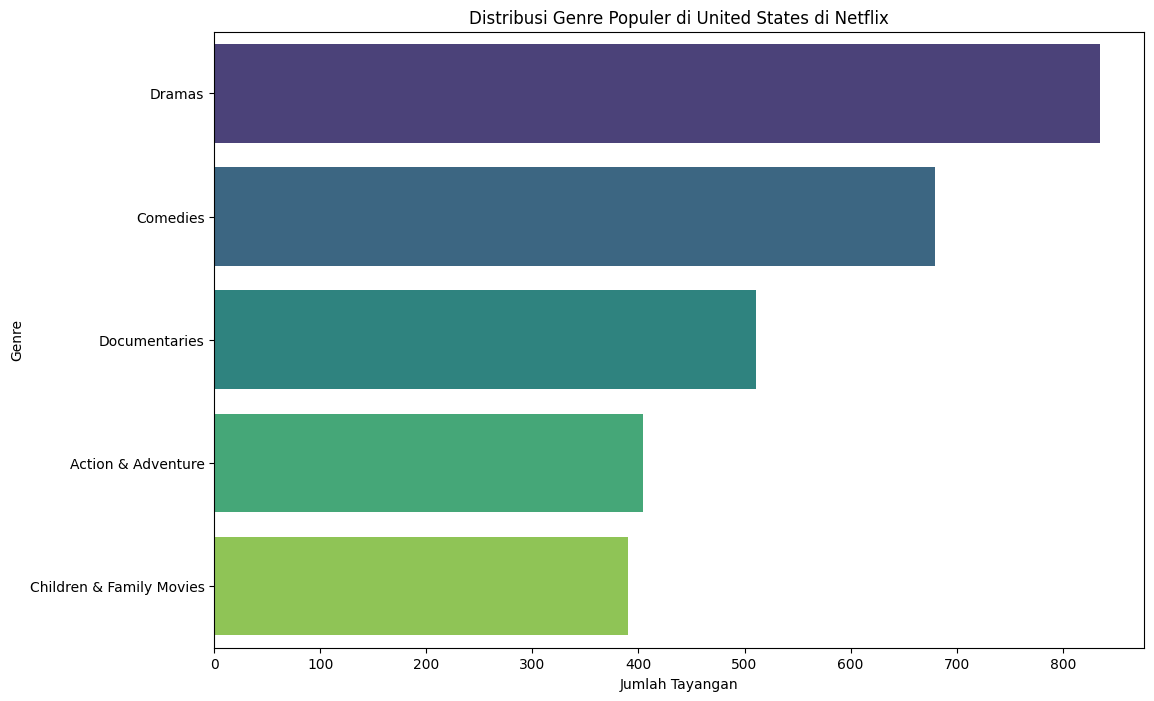

In [45]:
# Filter data untuk United States
us_data = df[df['country'] == 'United States']

# Mengelompokkan data berdasarkan genre dan menghitung jumlah tayangan per genre di United States
genre_distribution = us_data['listed_in'].str.split(', ', expand=True).stack().value_counts().reset_index()
genre_distribution.columns = ['genre', 'count']

# Mengurutkan dari genre dengan jumlah tayangan terbanyak
genre_distribution = genre_distribution.sort_values(by='count', ascending=False)
top_genre_in_United = genre_distribution.head(5)
# Menampilkan hasilnya
print(top_genre_in_United)

# Visualisasi distribusi genre
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='genre', data=top_genre_in_United, palette='viridis')

plt.title('Distribusi Genre Populer di United States di Netflix')
plt.xlabel('Jumlah Tayangan')
plt.ylabel('Genre')
plt.show()

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan data sudah dibaca ke dalam DataFrame bernama df
# df = pd.read_csv('path_to_your_dataset.csv')

# Memisahkan genre jika terdapat beberapa genre dalam satu sel
df['listed_in'] = df['listed_in'].str.split(', ')  # Memisahkan genre dengan koma dan spasi
df_exploded_genre = df.explode('listed_in')  # Memisahkan genre menjadi baris-baris terpisah

# Mengelompokkan data berdasarkan genre dan menghitung jumlah tayangan per genre di seluruh dunia
genre_distribution_global = df_exploded_genre['listed_in'].value_counts().reset_index()
genre_distribution_global.columns = ['genre', 'count']

# Mengurutkan dari genre dengan jumlah tayangan terbanyak
genre_distribution_global = genre_distribution_global.sort_values(by='count', ascending=False)



In [47]:
# Menampilkan hasilnya
genre_distribution_global.head()

,genre,count
0,International Movies,3509
1,Dramas,3199
2,Comedies,1981
3,International TV Shows,1465
4,Action & Adventure,1182


<ipython-input-48-c2047c6b9ccd>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




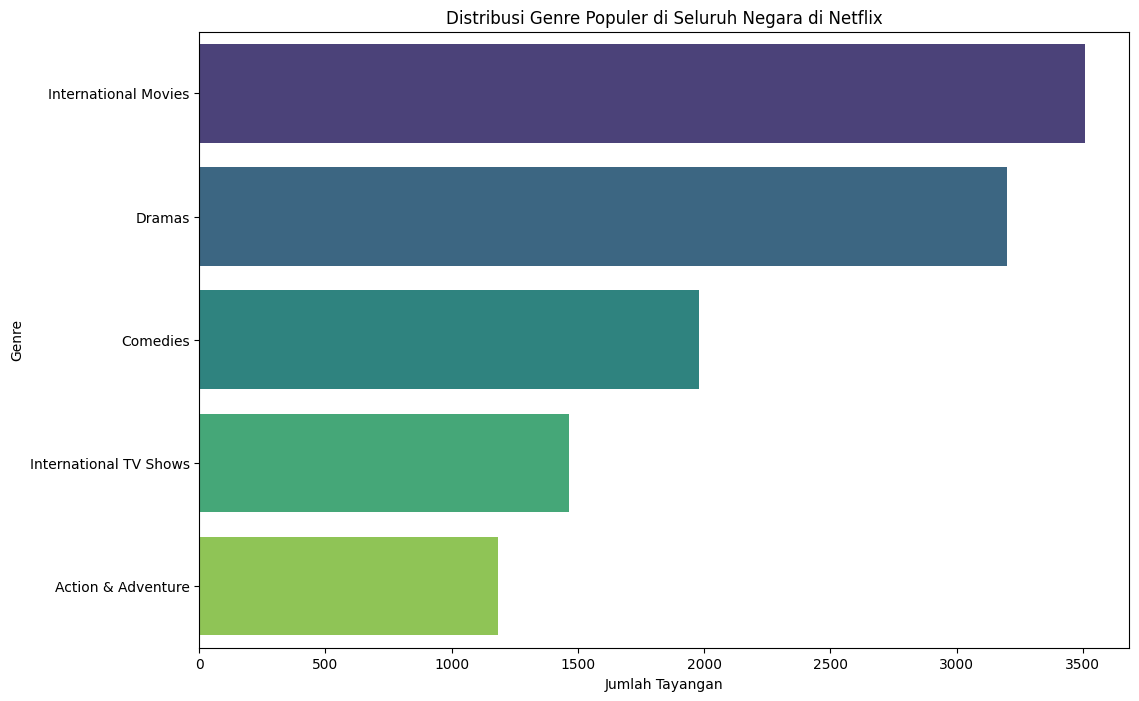

In [48]:
top_genre_in_global = genre_distribution_global.head(5)
# Visualisasi distribusi genre secara global
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='genre', data=top_genre_in_global, palette='viridis')

plt.title('Distribusi Genre Populer di Seluruh Negara di Netflix')
plt.xlabel('Jumlah Tayangan')
plt.ylabel('Genre')
plt.show()

## 3.time series dan korelasi popularitas: <br><br>
melihat apakah tayangan berdurasi lebih panjang lebih populer

In [49]:
# Mengelompokkan data berdasarkan tanggal dan jenis konten (Movie atau TV Show)
grouped_data = df.groupby(['date_added', 'type']).size().reset_index(name='num_of_titles')

# Menghitung jumlah kumulatif untuk setiap jenis konten
grouped_data['cumulative_titles'] = grouped_data.groupby('type')['num_of_titles'].cumsum()

# Membuat visualisasi time series untuk penambahan kumulatif
fig = px.line(grouped_data, x='date_added', y='cumulative_titles', color='type',
              labels={'date_added': 'Tanggal Ditambahkan', 'cumulative_titles': 'Jumlah Kumulatif', 'type': 'Jenis Konten'},
              title='Perbandingan Penambahan Kumulatif Film dan Acara TV Secara Global')

fig.show()

In [50]:
us_data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_seasons,cumulative_count
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,United States,2008-01-01,36,TV-MA,81 min,Thrillers,"While covering a story in New York City, a Sea...",81,0,1
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,United States,2008-01-01,36,TV-MA,81 min,Independent Movies,"While covering a story in New York City, a Sea...",81,0,2
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,United States,2008-01-01,36,TV-MA,81 min,Dramas,"While covering a story in New York City, a Sea...",81,0,3
6611,s6612,TV Show,Dinner for Five,other,United States,2008-02-04,37,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",420,1,4
5955,s5956,Movie,Splatter,Joe Dante,United States,2009-11-18,39,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",29,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,s8519,TV Show,The Story of God with Morgan Freeman,other,United States,NaT,47,TV-14,2 Seasons,Docuseries,Host Morgan Freeman explores religion's role i...,840,2,23742
8539,s8540,TV Show,The Tudors,other,United States,NaT,40,TV-MA,4 Seasons,TV Dramas,All the splendor and scandal of England's 16th...,1680,4,23745
8557,s8558,TV Show,The West Wing,other,United States,NaT,35,TV-14,7 Seasons,TV Dramas,This powerful political epic chronicles the tr...,2940,7,23747
8755,s8756,TV Show,Women Behind Bars,other,United States,NaT,40,TV-14,3 Seasons,Crime TV Shows,This reality series recounts true stories of w...,1260,3,23753


In [51]:
# Filter genre Drama di United States
drama_us_data = us_data[us_data['listed_in'].str.contains('Drama')]

In [52]:
# Hitung rata-rata durasi tayangan genre Drama
avg_duration_drama = drama_us_data['duration_minutes'].mean()

In [53]:
# Filter data untuk genre selain Drama
non_drama_us_data = us_data[~us_data['listed_in'].str.contains('Drama')]

# Hitung rata-rata durasi tayangan selain Drama
avg_duration_non_drama = non_drama_us_data['duration_minutes'].mean()

In [54]:
print("Rata-rata durasi Drama di US:", avg_duration_drama)
print("Rata-rata durasi genre lain di US:", avg_duration_non_drama)

Rata-rata durasi Drama di US: 344.60168697282097
Rata-rata durasi genre lain di US: 332.3844537815126


Dengan kata lain, tayangan Drama di United States cenderung memiliki durasi yang lebih panjang dibandingkan dengan tayangan dari genre lain. Ini bisa menjadi salah satu alasan mengapa genre Drama lebih populer. Durasi yang lebih panjang mungkin memberi kesempatan lebih banyak untuk pengembangan karakter dan cerita yang mendalam, yang bisa lebih menarik perhatian penonton di United States.

In [55]:
# Hitung jumlah tayangan per genre di United States
genre_counts_us = us_data['listed_in'].str.split(', ', expand=True).stack().value_counts()

In [56]:
# Hitung jumlah tayangan genre Drama di United States
drama_count_us = genre_counts_us.get('Drama', 0)

In [57]:
# Hitung jumlah tayangan total di United States
total_count_us = us_data.shape[0]

In [58]:
# Hitung proporsi tayangan genre Drama
proporsi_drama_us = drama_count_us / total_count_us

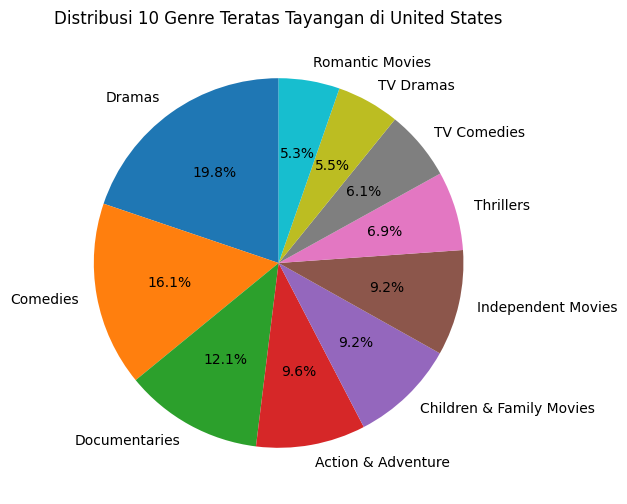

In [59]:
import matplotlib.pyplot as plt

# Ambil 10 genre teratas berdasarkan frekuensi tayangan
top_10_genres = genre_counts_us.nlargest(10)

# Buat pie chart untuk distribusi genre
plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribusi 10 Genre Teratas Tayangan di United States')
plt.ylabel('')
plt.show()

Hasil analisis menunjukkan bahwa:

Genre Drama adalah yang paling dominan di United States dengan presentase 12.3% dari total tayangan.<br>
**Kesimpulan:**<br>
Genre Drama tidak hanya memiliki durasi tayangan yang lebih panjang, tetapi juga mendominasi platform Netflix di United States. Dominasi ini bisa menjelaskan mengapa genre Drama begitu populer di negara tersebut. Ketersediaan tayangan Drama yang lebih banyak memberikan lebih banyak pilihan bagi penonton, yang mungkin berkontribusi pada tingginya minat terhadap genre ini.

In [60]:
# Hitung distribusi rating untuk semua tayangan di United States
rating_distribution = us_data['rating'].value_counts()

In [61]:
# Hitung distribusi rating untuk tayangan genre Drama di United States
drama_rating_distribution = drama_us_data['rating'].value_counts()

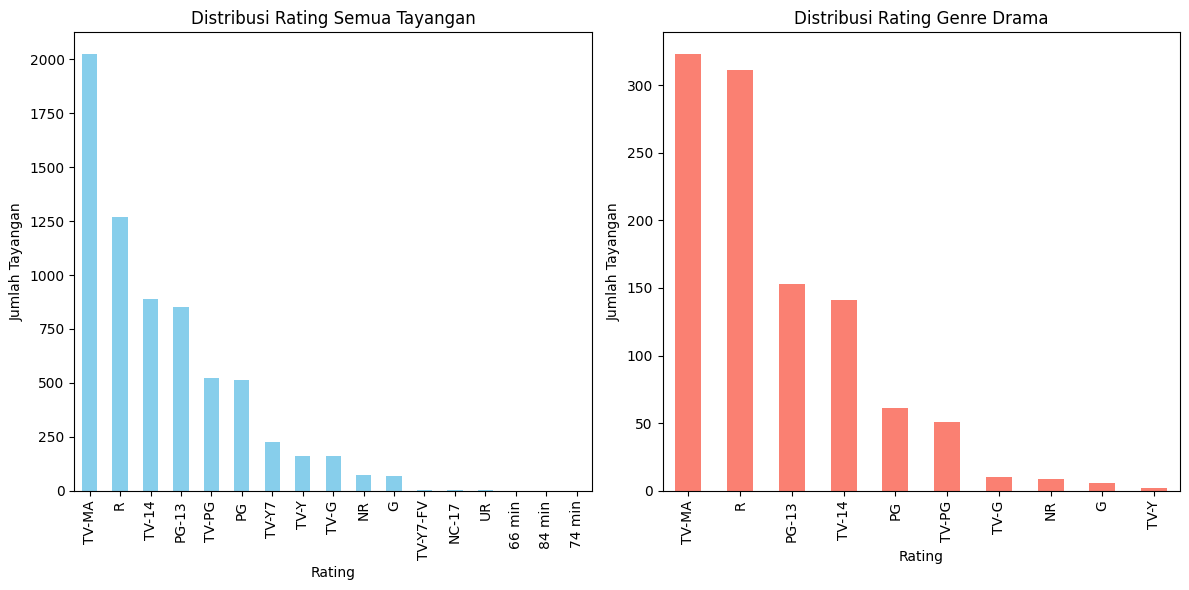

In [62]:
# Visualisasi distribusi rating untuk semua tayangan
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
rating_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribusi Rating Semua Tayangan')
plt.xlabel('Rating')
plt.ylabel('Jumlah Tayangan')

# Visualisasi distribusi rating untuk genre Drama
plt.subplot(1, 2, 2)
drama_rating_distribution.plot(kind='bar', color='salmon')
plt.title('Distribusi Rating Genre Drama')
plt.xlabel('Rating')
plt.ylabel('Jumlah Tayangan')

plt.tight_layout()
plt.show()


Tingkat popularitas genre Drama di United States yang tinggi mungkin dipengaruhi oleh beberapa faktor, termasuk:

Rating TV-MA dan R:

Banyak tayangan Drama di Netflix yang memiliki rating TV-MA atau R. Rating ini menunjukkan konten dewasa, yang bisa menarik bagi penonton dewasa yang mencari tayangan yang lebih kompleks dan mendalam.
Karena genre Drama sering kali menyertakan narasi yang mendalam dan karakter yang berkembang, konten dengan rating ini mungkin menarik bagi audiens yang lebih matang.
Durasi Tayangan:

Tayangan Drama cenderung memiliki durasi yang lebih panjang. Ini memberi ruang bagi pengembangan cerita dan karakter, yang mungkin meningkatkan keterlibatan penonton.

Ketersediaan Konten:

Distribusi tayangan Drama yang lebih banyak di Netflix (dengan presentase 12.3% di United States) berarti penonton memiliki banyak pilihan dalam genre ini. Hal ini bisa menjelaskan mengapa genre Drama begitu populer, karena penonton memiliki akses yang luas ke tayangan Drama.

Preferensi Penonton:

Penonton di United States mungkin lebih suka tayangan yang memiliki elemen dramatis dan emosional yang kuat, yang bisa memberikan pengalaman menonton yang lebih mendalam.

Kesimpulan:
Ya, rating tayangan yang tinggi (TV-MA dan R) serta ketersediaan tayangan Drama yang luas di Netflix bisa menjadi alasan utama mengapa genre Drama sangat populer di United States. Penonton dewasa cenderung tertarik pada tayangan yang lebih serius dan kompleks, yang sering kali termasuk dalam genre Drama.

# ML

## K-MEANS

kita akan melakukan cluster bedasarkan durasi dan rating.<BR>
TEORI<BR>
K-Means Clustering adalah algoritma unsupervised learning yang mengelompokkan data ke dalam beberapa cluster berdasarkan kemiripan fitur. Algoritma ini bekerja dengan memilih titik pusat (centroid) secara acak, lalu mengelompokkan data ke centroid terdekat. Proses ini diulangi sampai posisi centroid stabil, di mana tiap data ditempatkan di cluster dengan centroid terdekatnya.
<br>
lalu kenapa menggunakan K-means untuk hal ini?<br>
Pemilihan menggunakan K-means karena metode ini sederhana dan efisien untuk data besar seperti data netflix ini, serta fleksibel dalam menentukan jumlah cluster yang paling relevan.
<br>
K-Means membantu menemukan grup tayangan dengan pola serupa, seperti tayangan berdurasi panjang dengan rating tinggi atau film pendek dengan rating lebih rendah. Ini memberi wawasan yang berguna untuk segmentasi konten dan rekomendasi tayangan kepada pengguna.

In [76]:
# Definisikan mapping rating ke angka
rating_mapping = {
    'PG-13': 1, 'TV-MA': 2, 'PG': 3, 'TV-14': 4, 'TV-PG': 5,
    'TV-Y': 6, 'TV-Y7': 7, 'R': 8, 'TV-G': 9, 'G': 10, 'NC-17': 11,
    'NR': np.nan, 'UR': np.nan, 'TV-Y7-FV': 7
}

In [77]:
# Ganti rating dengan angka dan atasi nilai yang hilang
df['rating_numeric'] = df['rating'].map(rating_mapping)
df['rating_numeric'] = df['rating_numeric'].fillna(-1)  # Atasi rating yang hilang dengan nilai -1


In [78]:
from sklearn.preprocessing import StandardScaler

# Pilih fitur yang relevan
features = df[['duration_minutes', 'rating_numeric']]  # tambahkan fitur yang sesuai

# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [79]:
from sklearn.cluster import KMeans

# Menentukan jumlah cluster
n_clusters = 3  # Misalnya, memilih 3 cluster
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(features_scaled)

# Menambahkan hasil clustering ke DataFrame
df['Cluster'] = clusters

# Tampilkan hasil clustering
print(df[['title', 'Cluster']].head())

                        title  Cluster
5957     To and From New York        0
5957     To and From New York        0
5957     To and From New York        0
6611          Dinner for Five        0
5956  Just Another Love Story        0


In [80]:
# Analisis cluster
cluster_summary = df.groupby('Cluster').agg({
    'duration_minutes': ['mean', 'std'],
    'rating_numeric': ['mean', 'std']
})

print(cluster_summary)

        duration_minutes             rating_numeric          
                    mean         std           mean       std
Cluster                                                      
0             207.654763  188.679894       2.861819  1.315747
1             193.331486  220.199911       7.823416  0.901079
2            1914.308094  938.281092       3.620540  1.884411


Cluster 0 dan Cluster 1 memiliki durasi yang mirip tetapi berbeda dalam hal rating. Cluster 0 mungkin berisi tayangan yang lebih "premium" atau ditujukan untuk audiens yang lebih dewasa, sedangkan Cluster 1 mungkin memiliki tayangan yang lebih beragam dalam hal rating.

Cluster 2 memiliki durasi yang jauh lebih tinggi, menunjukkan tayangan seperti serial atau acara TV dengan banyak episode. Rating yang lebih rendah di cluster ini mungkin menunjukkan bahwa tayangan ini lebih beragam dalam target audiens.

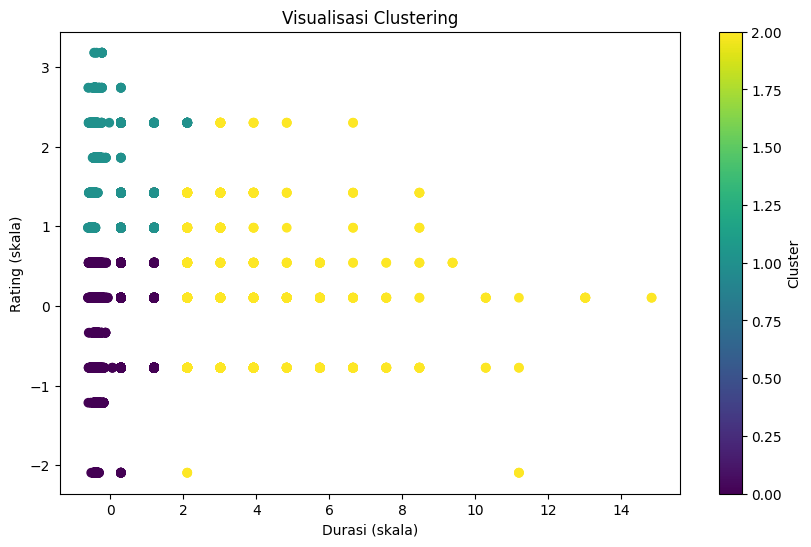

In [81]:
import matplotlib.pyplot as plt

# Visualisasi cluster
plt.figure(figsize=(10, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('Visualisasi Clustering')
plt.xlabel('Durasi (skala)')
plt.ylabel('Rating (skala)')
plt.colorbar(label='Cluster')
plt.show()

In [82]:
# Menampilkan beberapa contoh tayangan dari masing-masing cluster
def display_sample(cluster_number, num_samples=5):
    print(f"\nContoh tayangan dari Cluster {cluster_number}:")
    sample_df = df[df['Cluster'] == cluster_number].sample(n=num_samples, random_state=0)
    print(sample_df[['title', 'duration_minutes', 'rating_numeric', 'Cluster']])

# Menampilkan contoh dari Cluster 1, 2, dan 3
display_sample(cluster_number=0, num_samples=5)  # Cluster 1
display_sample(cluster_number=1, num_samples=5)  # Cluster 2
display_sample(cluster_number=2, num_samples=5)  # Cluster 3


Contoh tayangan dari Cluster 0:
                    title  duration_minutes  rating_numeric  Cluster
8103    Strictly Ballroom                95             3.0        0
1016          Delhi Belly               101             2.0        0
8447             The Pass                87            -1.0        0
1184  The Yin Yang Master               120             4.0        0
6196        Attitude Test                88             4.0        0

Contoh tayangan dari Cluster 1:
                                              title  duration_minutes  \
267                                       The Piano               121   
2356                                  Feel the Beat               110   
2785  Barbie Dreamhouse Adventures: Go Team Roberts               840   
1027                                   Crimson Peak               119   
1506                                Shaun the Sheep               840   

      rating_numeric  Cluster  
267              8.0        1  
2356             

Kesimpulan<br>
Cluster 0: <br>Menyediakan tayangan dengan durasi yang bervariasi dan rating yang cenderung lebih tinggi. Ini mungkin menunjukkan tayangan yang lebih premium atau tayangan untuk audiens yang lebih dewasa.

Cluster 1:<br> Menyediakan tayangan dengan durasi rata-rata yang lebih pendek dan rating yang lebih rendah. Cluster ini mungkin berisi film-film pendek atau tayangan yang lebih bervariasi dalam hal rating.

Cluster 2:<br> Didominasi oleh tayangan dengan durasi yang sangat panjang, seperti serial TV atau acara dengan banyak musim. Rating di cluster ini juga lebih tinggi, menunjukkan bahwa tayangan ini mungkin lebih populer atau memiliki penilaian yang lebih baik.

In [83]:
df.head()

,show_id,type,title,country,date_added,rating,duration,listed_in,duration_minutes,duration_seasons,cumulative_count,rating_numeric,Cluster
5957,s5958,Movie,To and From New York,United States,2008-01-01,TV-MA,81 min,[Thrillers],81,0,1,2.0,0
5957,s5958,Movie,To and From New York,United States,2008-01-01,TV-MA,81 min,[Independent Movies],81,0,2,2.0,0
5957,s5958,Movie,To and From New York,United States,2008-01-01,TV-MA,81 min,[Dramas],81,0,3,2.0,0
6611,s6612,TV Show,Dinner for Five,United States,2008-02-04,TV-MA,1 Season,[Stand-Up Comedy & Talk Shows],420,1,4,2.0,0
5956,s5957,Movie,Just Another Love Story,Denmark,2009-05-05,TV-MA,104 min,[International Movies],104,0,5,2.0,0


In [84]:
# Mengubah kolom "date_added" menjadi tipe data datetime
df['date_added'] = pd.to_datetime(df['date_added'], infer_datetime_format=True, errors='coerce')

<ipython-input-84-f821da0dc924>:2: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



In [89]:
#df = df.drop(columns=['release_year','description','director'])

In [86]:

print(df['date_added'].dtype)

datetime64[ns]


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23754 entries, 5957 to 8755
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           23754 non-null  object        
 1   type              23754 non-null  object        
 2   title             23754 non-null  object        
 3   country           23754 non-null  object        
 4   date_added        23526 non-null  datetime64[ns]
 5   rating            23754 non-null  object        
 6   duration          23754 non-null  object        
 7   listed_in         23754 non-null  object        
 8   duration_minutes  23754 non-null  int64         
 9   duration_seasons  23754 non-null  int64         
 10  cumulative_count  23754 non-null  int64         
 11  rating_numeric    23754 non-null  float64       
 12  Cluster           23754 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(7)
memory usage: 3

In [88]:
df.to_csv('Netflix.csv', index=False)